<a href="https://colab.research.google.com/github/jakjak42069/ee8603proj/blob/main/Adebisi_EE_8306_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Project

by *Jack Adebisi*

### Introduction

This project aims to develop a supervised model that can perform regression on Abalone tree data.

---

### Part 1: Data collection & Library Set Up

This is the general set up of all the data and libraries for the project. The comments show the process for this section.


#### Pycaret Setup

In [1]:
#Installing the Pycaret Library in full so as to not have any missing functions
!pip install pycaret[full] #[1]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.9 MB/

In [2]:
#This is installed because there was initial issues with plotting visualization
#of the dataset. For more info please see:
#https://stackoverflow.com/questions/72090241/unable-to-resolve-import-error-from-pycaret
!pip install markupsafe==2.0.1 #[2]

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 3.0.1 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


#### Library Installation

In [3]:
#Load all relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

#### Data Acquisition and Processing

In [4]:
#Get Abalone Data from UC Irbvinesite
!wget -q https://archive.ics.uci.edu/static/public/1/abalone.zip # [3]
!unzip abalone.zip -d abalone_data

Archive:  abalone.zip
  inflating: abalone_data/Index      
  inflating: abalone_data/abalone.data  
  inflating: abalone_data/abalone.names  


In [5]:
df_abalone_initial = pd.read_csv('/content/abalone_data/abalone.data', names=["sex","length","diameter","height","Whole_weight", "Shucked_weight", "Viscera_weight","Shell_weight", "Rings (target)"],header=None)
df_abalone_initial.head()


,sex,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings (target)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# checking features
cat = df_abalone_initial.select_dtypes(include='O').keys()
# display variabels
cat

Index(['sex'], dtype='object')

From the dataset, we can see that 'Sex' is a categorical data feature. This means that one hot encoding is required.

In [7]:
# creating new dataframe by restructuring the sex column

new_df = pd.get_dummies(df_abalone_initial["sex"],prefix='sex')
new_df.head()

,sex_F,sex_I,sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [8]:
# use pd.concat to join the new columns with original dataframe
df_abalone = pd.concat([new_df, df_abalone_initial],axis=1)

#drop the original 'sex' column since it is no longer needed
df_abalone.drop(['sex'],axis=1, inplace=True)
df_abalone

,sex_F,sex_I,sex_M,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings (target)
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<Axes: >

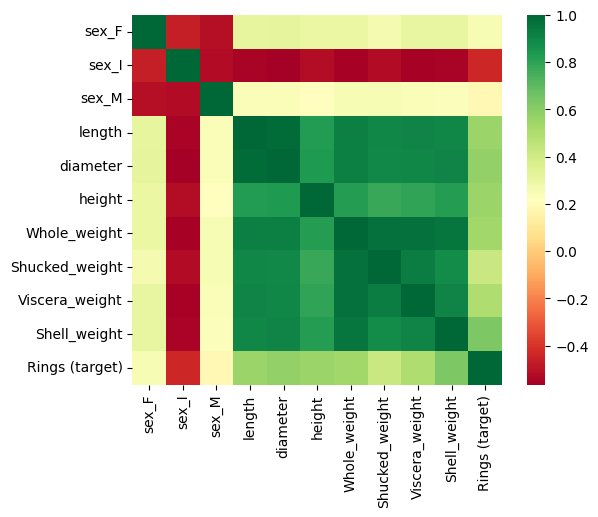

In [9]:
#EDA to get a general overview of important features
sns.heatmap(df_abalone.corr(), square=True, cmap='RdYlGn')

Sex will most likely need to be removed as further testing is done due to its very poor correlation scores

---

### Part 2: Initial Pycaret Model Analysis

#### Best Model Analysis

In [10]:
#Getting general data info about the abalone dataframe

import jinja2
from pycaret.regression import *
s = setup(df_abalone, target = 'Rings (target)', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings (target)
2,Target type,Regression
3,Original data shape,"(4177, 11)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [11]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [12]:
#Access X_train_transformed
get_config('X_train_transformed')

,sex_F,sex_I,sex_M,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
112,0.0,1.0,0.0,0.435,0.320,0.080,0.3325,0.1485,0.0635,0.1050
2979,0.0,0.0,1.0,0.490,0.355,0.155,0.9810,0.4650,0.2015,0.2505
1715,0.0,0.0,1.0,0.645,0.485,0.150,1.2215,0.5695,0.2735,0.3300
3548,1.0,0.0,0.0,0.495,0.370,0.120,0.5940,0.2800,0.1100,0.1375
3911,0.0,1.0,0.0,0.355,0.270,0.100,0.2160,0.0830,0.0370,0.0750
...,...,...,...,...,...,...,...,...,...,...
1593,0.0,1.0,0.0,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
4060,0.0,1.0,0.0,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
1346,0.0,0.0,1.0,0.585,0.450,0.180,0.7995,0.3360,0.1855,0.2370
3454,1.0,0.0,0.0,0.575,0.460,0.165,1.0650,0.4985,0.2145,0.2815


In [13]:
# init setup with normalize = True
s2 = setup(df_abalone, target = 'Rings (target)', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Rings (target)
2,Target type,Regression
3,Original data shape,"(4177, 11)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [14]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5146,4.5751,2.1364,0.5591,0.1723,0.1498,3.6900
gbr,Gradient Boosting Regressor,1.5179,4.6226,2.1475,0.5548,0.1729,0.1504,0.3780
rf,Random Forest Regressor,1.5382,4.7072,2.1672,0.5460,0.1754,0.1528,1.1190
lightgbm,Light Gradient Boosting Machine,1.5533,4.7960,2.1875,0.5382,0.1760,0.1532,0.5140
et,Extra Trees Regressor,1.5533,4.8025,2.1901,0.5367,0.1769,0.1540,0.9530
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.0650
lr,Linear Regression,1.5988,5.0248,2.2387,0.5160,0.1829,0.1602,1.0940
huber,Huber Regressor,1.5649,5.0492,2.2454,0.5146,0.1809,0.1509,0.1590
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1829,0.1610,0.0560
xgboost,Extreme Gradient Boosting,1.6045,5.1596,2.2694,0.5026,0.1830,0.1586,0.1480


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

When the pycaret model comparison is run, CatBoost Regressor comes out on top with all evaluation metrics ranking the highest; MAE is 1.5144, MSE is 4.5752, RSME is 2.1364, R2 is 0.5591. RSMPLE and MAPE will be ignored since they are not as strong of metrics.

CatBoost is a "high-performance open-source library for gradient boosting on decision trees" [4].

#### Best Model Visualization

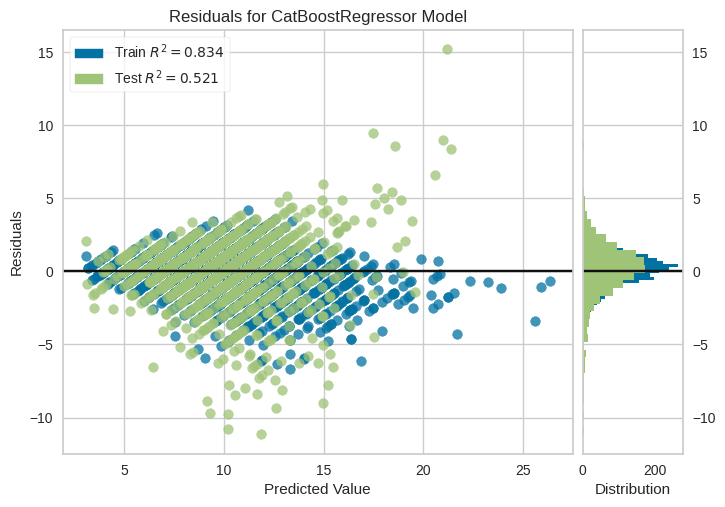

In [15]:
# plot residuals
plot_model(best, plot = 'residuals')

From the plot we can see that Catboost regressor works best on this dataset.

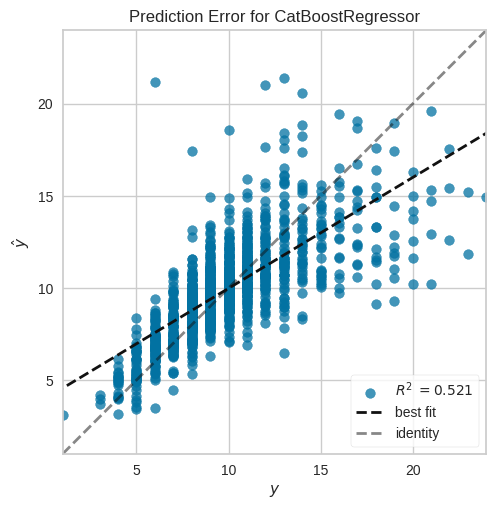

In [16]:
# plot error
plot_model(best, plot = 'error')

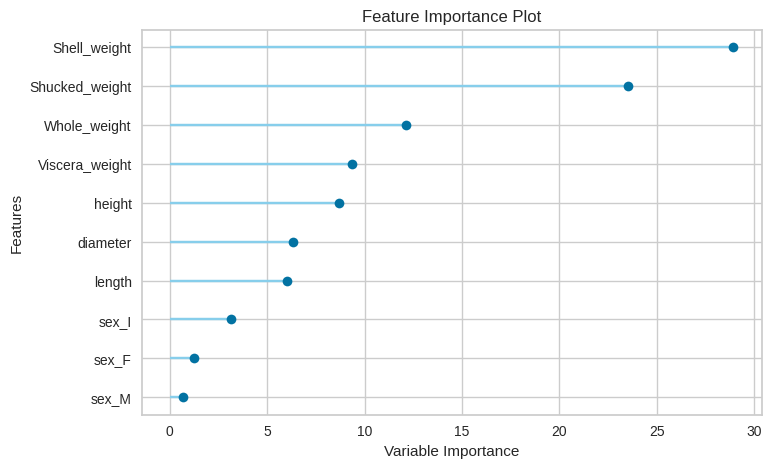

In [17]:
# plot feature importance
plot_model(best, plot = 'feature')

This table shows the features of the dataset from most important to predictions to least. As can be seen, sex is below a 5, which matches up with initial observations from the EDA.

In [18]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.5274,4.8823,2.2096,0.5211,0.1781,0.1534


In [19]:
# show predictions df
holdout_pred.head()

,sex_F,sex_I,sex_M,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings (target),prediction_label
2812,0,1,0,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,5.098108
1344,0,0,1,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10,9.673498
533,1,0,0,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9,8.895282
866,0,0,1,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9,13.419324
3939,0,0,1,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14,11.965261


#### Model Creation, Tuning and Saving

In [20]:
# tune hyperparameters of catboost model
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5346,4.6468,2.1556,0.5514,0.1817,0.1607
1,1.5922,4.9334,2.2211,0.5217,0.1793,0.1595
2,1.5423,5.1420,2.2676,0.5118,0.1782,0.1474
3,1.5480,4.8178,2.1950,0.6014,0.1736,0.1458
4,1.3866,3.9894,1.9974,0.6276,0.1593,0.1344
5,1.4542,4.0449,2.0112,0.5894,0.1655,0.1474
6,1.5671,4.3310,2.0811,0.4881,0.1761,0.1574
7,1.5779,4.8119,2.1936,0.5798,0.1719,0.1525
8,1.5261,5.2598,2.2934,0.5054,0.1832,0.1563


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
# copy data and drop Rings

new_data = df_abalone.copy()
new_data.drop('Rings (target)', axis=1, inplace=True)
new_data.head()

,sex_F,sex_I,sex_M,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [22]:
# predict model on "new data"
predictions = predict_model(best, new_data)
predictions.head()

,sex_F,sex_I,sex_M,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,prediction_label
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,10.189558
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.981391
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.592492
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9.766608
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6.477385


In [23]:
# save first model pipeline for future reference
save_model(tuned_best, 'pipeline_one')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sex_F', 'sex_I', 'sex_M',
                                              'length', 'diameter', 'height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7cfdf4d75360>)]),
 'pipeline_one.pkl')

Some notes about this initial process:


*   _
*   _



---

### Part 3: Data Feature Restructuring

An experiment will be performed to see if dropping features with a variable of importance less than 5 changes the results from pycaret. From the Abalone dataframe, the features dropped are Sex_I, Sex_F and Sex_M.

#### Best Model Analysis

In [24]:
df_abalone_new = df_abalone[["length","diameter","height","Whole_weight", "Shucked_weight", "Viscera_weight","Shell_weight","Rings (target)"]]

In [25]:
from pycaret.regression import *
s = setup(df_abalone_new, target = 'Rings (target)', session_id = 246)

,Description,Value
0,Session id,246
1,Target,Rings (target)
2,Target type,Regression
3,Original data shape,"(4177, 8)"
4,Transformed data shape,"(4177, 8)"
5,Transformed train set shape,"(2923, 8)"
6,Transformed test set shape,"(1254, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [26]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [27]:
#Access X_train_transformed
get_config('X_train_transformed')

,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1528,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015
3270,0.625,0.475,0.130,0.8595,0.3195,0.1775,0.2400
3069,0.655,0.540,0.165,1.4030,0.6955,0.2385,0.4200
3190,0.200,0.145,0.025,0.0345,0.0110,0.0075,0.0100
3765,0.535,0.450,0.135,0.7280,0.2845,0.1845,0.2650
...,...,...,...,...,...,...,...
3362,0.410,0.300,0.100,0.3010,0.1240,0.0690,0.0900
2606,0.625,0.480,0.170,1.3555,0.6710,0.2680,0.3385
2112,0.525,0.405,0.130,0.7185,0.3265,0.1975,0.1750
1668,0.610,0.475,0.155,0.9830,0.4565,0.2280,0.2660


In [28]:
# init setup with normalize = True
s = setup(df_abalone_new, target = 'Rings (target)', session_id = 246,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,246
1,Target,Rings (target)
2,Target type,Regression
3,Original data shape,"(4177, 8)"
4,Transformed data shape,"(4177, 8)"
5,Transformed train set shape,"(2923, 8)"
6,Transformed test set shape,"(1254, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [29]:
# compare baseline models
best2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5757,4.7552,2.1773,0.5305,0.1794,0.1593,0.7670
rf,Random Forest Regressor,1.5740,4.7689,2.1805,0.5290,0.1799,0.1591,1.0610
catboost,CatBoost Regressor,1.5636,4.7779,2.1818,0.5280,0.1782,0.1572,3.2570
gbr,Gradient Boosting Regressor,1.5592,4.8030,2.1879,0.5259,0.1789,0.1569,0.5770
lightgbm,Light Gradient Boosting Machine,1.5710,4.8050,2.1888,0.5255,0.1795,0.1575,0.1870
knn,K Neighbors Regressor,1.6056,5.1283,2.2599,0.4937,0.1856,0.1601,0.0690
lr,Linear Regression,1.6308,5.1551,2.2611,0.4921,0.1864,0.1665,0.0490
br,Bayesian Ridge,1.6311,5.1576,2.2616,0.4919,0.1865,0.1665,0.0530
huber,Huber Regressor,1.5828,5.1708,2.2664,0.4907,0.1849,0.1551,0.1510
ridge,Ridge Regression,1.6477,5.3042,2.2916,0.4784,0.1897,0.1677,0.0570


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

From here, the best model seems to change from the CatBoost regressor to the Extra Trees Regressor, with the following evaluation metrics; MAE is 11.5757, MSE is 4.7552, RSME is 2.1773, and R2 is 0.5305. RSMPLE and MAPE will be ignored once again, since they are not as strong of metrics.

The Extra Trees regressor is an ensemble machine learning algorithm that combines the predictions from many decision trees [5].

An interesting thing to note is that the Gradient Boosting Regressor scored highest on MAE with a vallue of 1.5992

#### Best Model Visualization

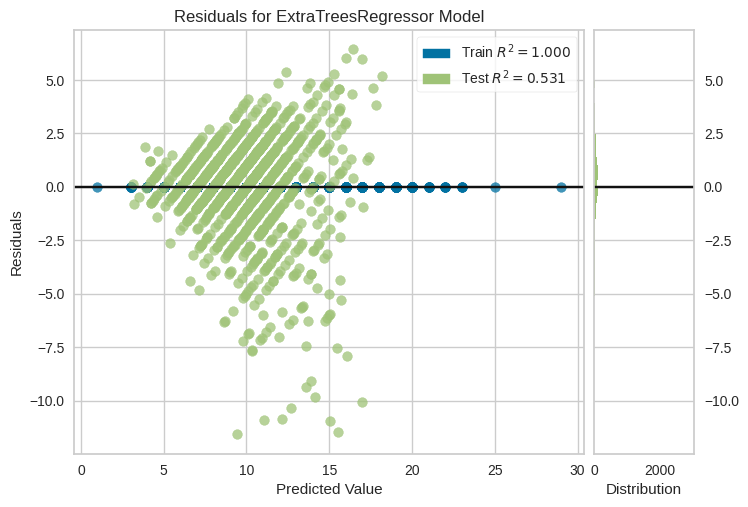

In [30]:
# plot residuals
plot_model(best2, plot = 'residuals')

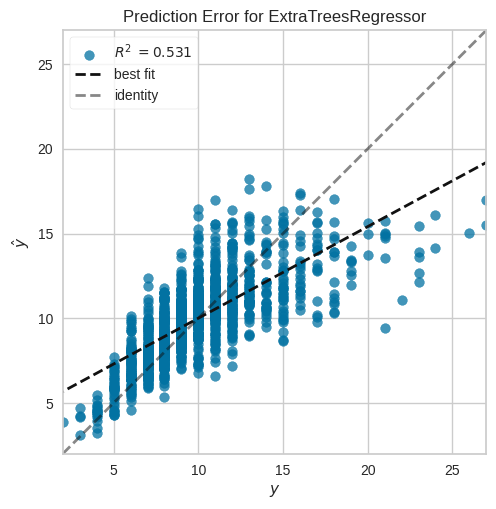

In [31]:
# plot error
plot_model(best2, plot = 'error')

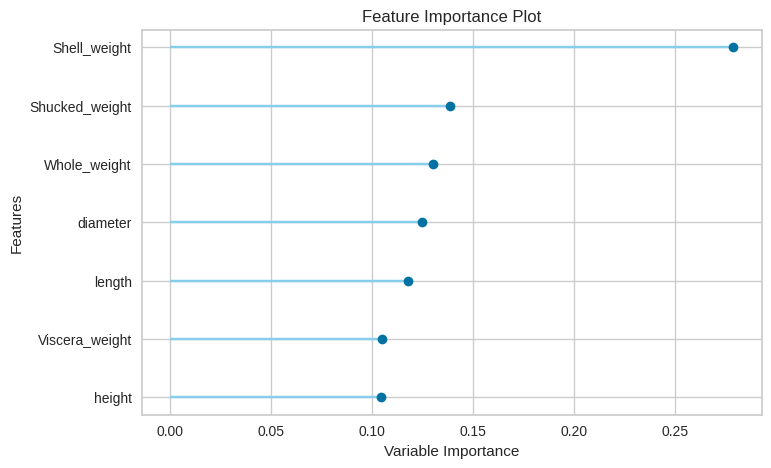

In [32]:
# plot feature importance
plot_model(best2, plot = 'feature')

In comparison with the original model (pipeline one), the variable importance is scaled down.

#### Model Creation, Tuning and Saving

In [33]:
# tune hyperparameters of extra tree regressor model
tuned_best2 = tune_model(best2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4655,4.1321,2.0328,0.5902,0.1682,0.1455
1,1.4224,3.5942,1.8958,0.5898,0.1612,0.1483
2,1.5099,4.3767,2.0921,0.5431,0.1736,0.1521
3,1.5365,4.7568,2.1810,0.5006,0.1764,0.1518
4,1.5236,5.1987,2.2801,0.4810,0.1766,0.1537
5,1.6548,5.4285,2.3299,0.5527,0.1895,0.1644
6,1.4840,3.8578,1.9641,0.5591,0.1709,0.1538
7,1.6131,5.0045,2.2371,0.5456,0.1760,0.1543
8,1.5596,4.8838,2.2099,0.5615,0.1739,0.1530


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
# copy data and drop Rings

new_data = df_abalone_new.copy()
new_data.drop('Rings (target)', axis=1, inplace=True)
new_data.head()

,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [35]:
# predict model on "new data"
predictions = predict_model(tuned_best2, new_data)
predictions.head()

,length,diameter,height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,prediction_label
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,8.711122
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.554673
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.064182
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9.665271
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6.684958


In [36]:
# save first model pipeline for future reference
save_model(tuned_best2, 'pipeline_two')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['length', 'diameter', 'height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  ExtraTreesRegressor(max_depth=11, min_impurity_decrease=0.0002,
                                      min_samples_leaf=5, n_estimators=70,
                                      n_jobs=-1, 

Some notes about this process:


*   _
*   _



### Part 4: Model Comparison

A model comparison will be done to see which is more efficient; CatBoost Regressor with the 'sex' feature column or Extra Tree Regressor with the 'sex' feature column removed.

The datasets will be split randomly so as to test the accuracy of the

In [37]:
#

# X is feature matrix
X = df_abalone.drop('Rings (target)',1)

# y is target values
y = df_abalone['Rings (target)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [38]:
tuned_best.fit(X_train, y_train)

y_pred = tuned_best.predict(X_test)
y_pred

array([12.07408978,  9.31176751, 15.92392846, ...,  8.28450289,
       11.71417794,  9.83557225])

In [39]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(tuned_best.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5275395820943438
Root Mean Squared Error: 2.19034847399505


In [40]:
#

# X is feature matrix
X_new = df_abalone_new.drop('Rings (target)',1)

# y is target values
y_new = df_abalone_new['Rings (target)']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.3, random_state=42)

In [41]:
tuned_best2.fit(X_new_train, y_new_train)

y_new_pred = tuned_best2.predict(X_new_test)
y_new_pred

array([12.11849133,  9.8084838 , 14.95393345, ...,  8.82875185,
       11.48628902,  8.71378931])

In [42]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(tuned_best2.score(X_new_test, y_new_test)))
rmse = np.sqrt(mean_squared_error(y_new_test,y_new_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5440019876373328
Root Mean Squared Error: 2.1518499007460914


### Part 5: API Upload (Extra Credit)

For the extra credit part of this project, an API will be uploaded to the cloud.

In [43]:
# dashboard function
#dashboard(tuned_best2, display_format ='inline')

In [44]:
# create api
create_api(tuned_best2, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [45]:
#Docker
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [46]:

final_best = finalize_model(tuned_best2)
final_best


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['length', 'diameter', 'height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(max_depth=11, min_impurity_decrease=0.0002,
                                     min_samples_leaf=5, n_estimators=70,
                                     n_jobs=-1, random_state=246))])

In [47]:
!python my_first_api.py
# check out the .py file created with this magic command
#%load my_first_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [27143]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [27143]


In [48]:
%load my_first_api.py

### Part 6: Conclusion

This project showed the_

### References



* [1] M. Ali, “pycaret/tutorials  /Tutorial - Regression.ipynb” GitHub, 2019. Available: https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb. [Accessed: Nov. 02, 2023]

* [2] Hadija and RossML , “Unable to Resolve Import Error from PyCaret,” Stack Overflow, May 2022. Available: https://stackoverflow.com/questions/72090241/unable-to-resolve-import-error-from-pycaret. [Accessed: Nov. 02, 2023]

- [3] W. Nash, T. Sellers, S. Talbot, A. Cawthorn, and W. Ford, “UCI Machine Learning Repository,” archive.ics.uci.edu, 1995. Available: https://archive.ics.uci.edu/dataset/1/abalone. [Accessed: Oct. 13, 2023]

- [4] A. Oppermann, “What Is CatBoost? (Definition, How Does It Work?) | Built in,” builtin.com, Apr. 06, 2023. Available: https://builtin.com/machine-learning/catboost

- [5] J. Brownlee, “How to Develop an Extra Trees Ensemble with Python,” Machine Learning Mastery, Apr. 21, 2020. Available: https://machinelearningmastery.com/extra-trees-ensemble-with-python/. [Accessed: Nov. 02, 2023]